<a href="https://colab.research.google.com/github/riaarun25/Link-Prediction-Python/blob/main/SAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPROCESSING**


**IMPORTING LIBRARIES**

In [1]:
%matplotlib inline

import random

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from pandas import HDFStore, DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

**LOADING AND EXPLORING DATA**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving musae_facebook_edges.csv to musae_facebook_edges.csv


In [3]:
# Reading data from the csv file into pandas data frame

data_set = pd.read_csv('musae_facebook_edges.csv')

In [4]:
print("Showing data for first 10 rows (edges)")
data_set.head(10)

Showing data for first 10 rows (edges)


,source_node,destination_node
0,0,18427
1,1,22405
2,1,22265
3,1,22208
4,1,22171
5,1,21729
6,1,21708
7,1,20135
8,1,20024
9,1,19743


In [5]:
print("Showing data for last 10 rows (edges)")
data_set.tail(10)

Showing data for last 10 rows (edges)


,source_node,destination_node
170993,22464,14438
170994,22464,13642
170995,22464,13443
170996,22464,13085
170997,22464,12932
170998,22464,12677
170999,22464,10606
171000,22464,10203
171001,22464,9677
171002,22464,1987


In [6]:
# Displaying columns and row information of data-frame along with column-label information

print(data_set.shape)
print(data_set.columns)

(171003, 2)
Index(['source_node', 'destination_node'], dtype='object')


In [7]:
# Displaying detailed information on the data frame

print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171003 entries, 0 to 171002
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   source_node       171003 non-null  int64
 1   destination_node  171003 non-null  int64
dtypes: int64(2)
memory usage: 2.6 MB
None


In [8]:
# Checking for any null data points

print(data_set[data_set.isna().any(1)])

# Check for duplicate data points 

print("Number of duplicate entries: ", sum(data_set.duplicated()))

Empty DataFrame
Columns: [source_node, destination_node]
Index: []
Number of duplicate entries:  0


In [9]:
# Saving the data frame into a new csv file without column label information

data_set.to_csv('data_set.csv', header = False, index = False)
print("Data Frame has been saved into new csv file")

Data Frame has been saved into new csv file


In [10]:
# Forming the directed graph from csv file using NetworkX library from python

graph = nx.read_edgelist('data_set.csv', delimiter = ',', create_using = nx.DiGraph(), nodetype=int)
print(nx.info(graph))

DiGraph with 22470 nodes and 171003 edges


In [11]:
# Displaying properties for node number 14

print(nx.info(graph,14))

Node 14 has the following properties:
Degree: 55
Neighbors: 22020 21323 21157 20655 20071 19837 18858 18512 18216 18062 17866 17325 16630 16534 15323 14666 14392 14164 13511 12017 11557 11332 11315 11034 10641 10622 10426 10418 10182 10109 9946 9745 9105 8389 8004 8002 7301 6037 5994 5822 5458 5398 4502 4328 3848 3695 3128 2904 2684 2327 2075 1943 1187 1041


**VISUALIZING A SUBGRAPH**

DiGraph with 105 nodes and 100 edges


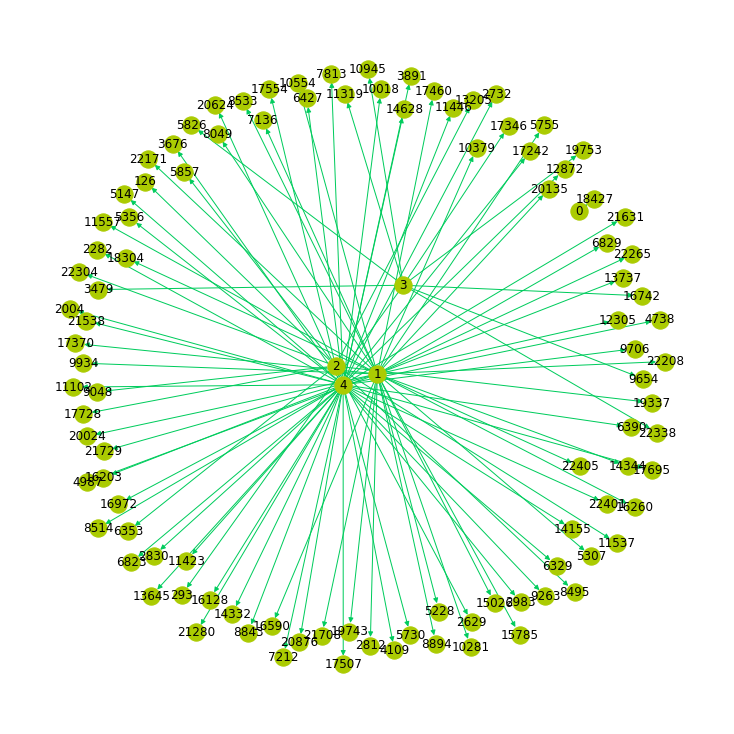

In [12]:
#Plotting subgraph of first 100 entries in the data fram

# Reading first 100 rows into new csv file and forming subgraph from it
data_set[:100].to_csv('subgraph_data_set.csv', header = False, index = False)
subgraph = nx.read_edgelist('subgraph_data_set.csv', delimiter =',',create_using = nx.DiGraph(), nodetype = int)


# Plotting graph using matplotlib and networkx libraries
plt.figure(figsize = (10, 10))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color = '#ABCB02', edge_color = '#00CC5D', width = 1, edge_cmap = plt.cm.Blues, with_labels = True)


#Displaying properties of subgraph
print(nx.info(subgraph))

# **DATA ANALYSIS**

In [13]:
# Displaying number of Unique pages (nodes) in the graph

print("The number of unique pages = ", len(graph.nodes()))  

The number of unique pages =  22470


**FACEBOOK PAGE FOLLOWER ( Page A is liked by Page B ) LIKER ANALYSIS**

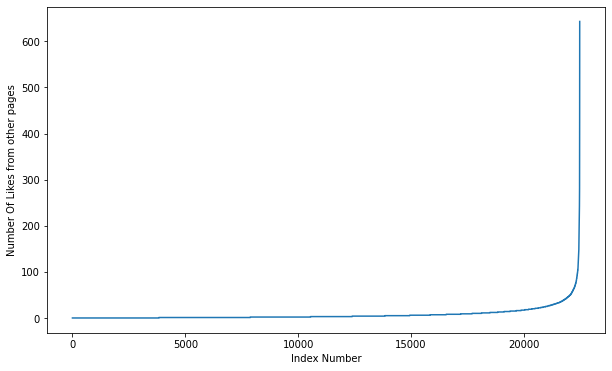

22470


In [14]:
#Displaing a distribution for the in-degree characteristics of the directed graph

indegree_data = list(dict(graph.in_degree()).values())
indegree_data.sort()
plt.figure(figsize=(10, 6))
plt.plot(indegree_data)
plt.xlabel('Index Number')
plt.ylabel('Number Of Likes from other pages')
plt.show()
print(len(indegree_data))

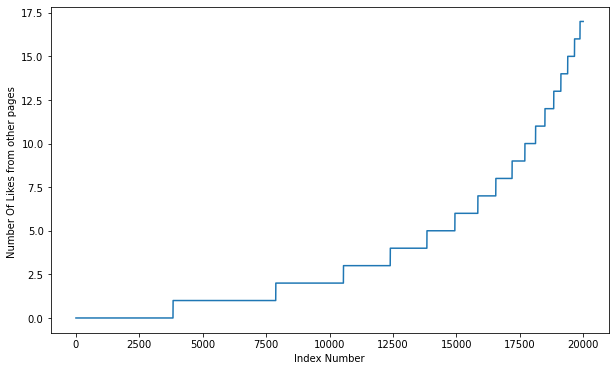

In [15]:
# Displaying the in-degree for first 20000 nodes after sorting

indegree_data = list(dict(graph.in_degree()).values()) 
indegree_data.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_data[:20000])
plt.xlabel('Index Number')
plt.ylabel('Number Of Likes from other pages ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


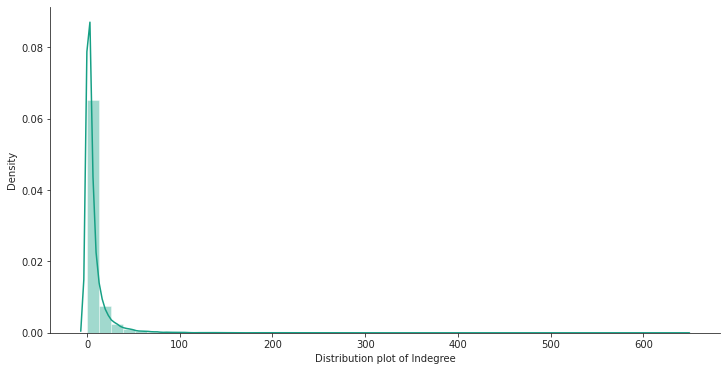

In [16]:
# Visualizing the distribution using seaborn

import seaborn as sns
sns.set_style('ticks')
plt.figure(figsize = (12, 6))
sns.distplot(indegree_data, color = '#16A085')
plt.xlabel('Distribution plot of Indegree')
sns.despine()

In [17]:
print('No. of pages having zero likes from other pages are', sum(np.array(indegree_data) == 0),
      'and % is', sum(np.array(indegree_data) == 0)*100/len(indegree_data))

No. of pages having zero likes from other pages are 3827 and % is 17.031597685803295


**FACEBOOK PAGE LIKES ( Page A likes Page B ) ANALYSIS**

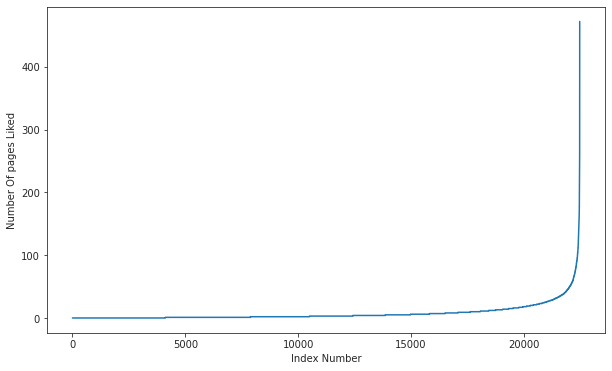

In [18]:
# Displaing a distribution for the out-degree characteristics of the directed graph

outdegree_data = list(dict(graph.out_degree()).values()) 
outdegree_data.sort()
plt.figure(figsize = (10, 6))
plt.plot(outdegree_data)
plt.xlabel('Index Number')
plt.ylabel('Number Of pages Liked')
plt.show()

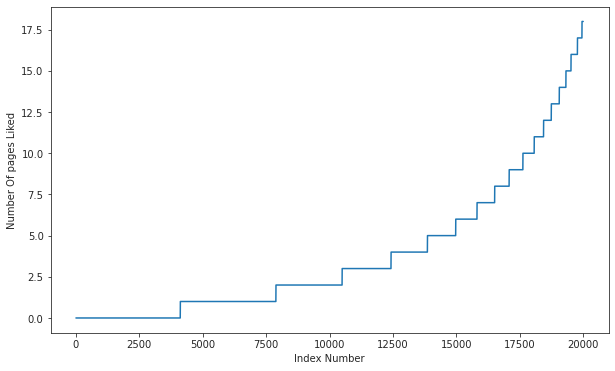

In [19]:
outdegree_data = list(dict(graph.out_degree()).values())
outdegree_data.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_data[0:20000])
plt.xlabel('Index Number')
plt.ylabel('Number Of pages Liked')
plt.show()

In [20]:
print('No. of pages that have not liked any page ', sum(np.array(outdegree_data)==0),
      'and % is', sum(np.array(outdegree_data)==0)*100/len(outdegree_data) )

No. of pages that have not liked any page  4113 and % is 18.30440587449933


# **GENERATING THE ML PROBLEM**

**CREATING DATASET WITH LINKS THAT DO NOT EXIST IN THE GRAPH AND HAVE SHORTEST PATH >= 2**
**(i.e path between page A and page B is > 2 implies that page A has a lower probability to "like" page B)**

In [21]:
import pickle
import csv

#Introducing an eqaul number of missing edges (bad links) into a new data set

#Creating a dictionary to store existing edges 
file = csv.reader(open('data_set.csv', 'r'))
edges = dict()
for edge in file:
    edges[(edge[0], edge[1])] = 1

#Generating a random list of edges that do not exist in the original graph
# and the length between 2 nodes is greater than or equal to 2

absent_edges = set([])
while (len(absent_edges) < 171002):
    nodei = random.randint(0, 22469)
    nodej = random.randint(0, 22469)
    temp = edges.get((nodei, nodej), -1)

    if temp == -1 and nodei != nodej:
        try:
            if nx.shortest_path_length(g, source = nodei, target = nodej) >= 2:
                absent_edges.add((nodei, nodej))
            else:
                continue
        except:
            absent_edges.add((nodei, nodej))
    else:
        continue

# We take a pickle dump of the missing edges (bad links) 
pickle.dump(absent_edges, open('absent_edges_final.p','wb'))

In [22]:
# Displaing number of missing edges formed

len(absent_edges)

171002

**TRAIN-TEST SPLIT AND ANALYSIS**

In [23]:
# Reading the pickle dump into the absent_edges variable
absent_edges = pd.read_pickle('absent_edges_final.p')

# Generating 2 data frames for storing original edges and missing edges
df_orig = data_set[:]
df_msng = pd.DataFrame(list(absent_edges), columns = ['source_node', 'destination_node'])

print("Number of edges in the original data set:", df_orig.shape[0])
print("Number of missing edges in the newly created data set:", df_msng.shape[0])

''' Performing a Train-Test split (80 - 20) to split data into testing and training data
   Positive Links (Original Edges) and Negative Links (Missing Edges) are split separately
   since only the positive training data will be used in feature training '''

#Importing the train_test_split function 
from sklearn.model_selection import train_test_split

#Splitting the data set into train and test sets on 80-20 split
Xtrain_orig, Xtest_orig, ytrain_orig, ytest_orig  = train_test_split(df_orig, np.ones(len(df_orig)), test_size = 0.2, random_state = 101)
Xtrain_msng, Xtest_msng, ytrain_msng, ytest_msng  = train_test_split(df_msng, np.zeros(len(df_msng)), test_size = 0.2, random_state = 101)

print('- '*60)
print("Number of original edges in the train data set of the form (Xtrain_orig, ytrain_orig):", (Xtrain_orig.shape[0], ytrain_orig.shape[0]))
print("Number of missing edges in the train data set of the form (Xtrain_msng, ytrain_msng):", (Xtrain_msng.shape[0], ytrain_msng.shape[0]))
print('- '*60)
print("Number of original edges in the test data set of the form (Xtest_orig, ytest_orig):", (Xtest_orig.shape[0], ytest_orig.shape[0]))
print("Number of missing in the test data set of the form (Xtest_msng, ytest_msng):", (Xtest_msng.shape[0], ytest_msng.shape[0]))

# Saving the data sets found into new csv files

Xtrain_orig.to_csv('split_train_orig.csv', header = False, index = False)
Xtest_orig.to_csv('split_test_orig.csv', header = False, index = False)
Xtrain_msng.to_csv('split_train_msng.csv', header = False, index = False)
Xtest_msng.to_csv('split_test_msng.csv', header = False, index = False)

Number of edges in the original data set: 171003
Number of missing edges in the newly created data set: 171002
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Number of original edges in the train data set of the form (Xtrain_orig, ytrain_orig): (136802, 136802)
Number of missing edges in the train data set of the form (Xtrain_msng, ytrain_msng): (136801, 136801)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Number of original edges in the test data set of the form (Xtest_orig, ytest_orig): (34201, 34201)
Number of missing in the test data set of the form (Xtest_msng, ytest_msng): (34201, 34201)


In [24]:
#Forming the train and test graph using csv files created

train_graph = nx.read_edgelist('split_train_orig.csv', delimiter=',',create_using = nx.DiGraph(), nodetype = int)
test_graph = nx.read_edgelist('split_test_orig.csv', delimiter=',',create_using = nx.DiGraph(), nodetype = int)

#Displaying the train and test graph information

print("train_graph\n")
print(nx.info(train_graph))
print("- "*30) 

print("test_graph\n")
print(nx.info(test_graph))
print("- "*30) 

# Finding and displaing pages(nodes) that are unique to both train and test graph
train_nodes_orig = set(train_graph.nodes())
test_nodes_orig = set(test_graph.nodes())

common = len(train_nodes_orig.intersection(test_nodes_orig))
only_train = len(train_nodes_orig - test_nodes_orig)
only_test = len(test_nodes_orig - train_nodes_orig)

print('no. of Nodes (pages) common in train and test -- ',common)
print('no. of Nodes (pages) present in train but not in test -- ',only_train)
print('no. of Nodes (pages) present in test but not in train -- ',only_test)
print('% of Users not there in Train but exist in Test {} %'.format(only_test/len(test_nodes_orig)*100))

train_graph

DiGraph with 21836 nodes and 136802 edges
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
test_graph

DiGraph with 15924 nodes and 34201 edges
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
no. of Nodes (pages) common in train and test --  15290
no. of Nodes (pages) present in train but not in test --  6546
no. of Nodes (pages) present in test but not in train --  634
% of Users not there in Train but exist in Test 3.981411705601608 %


In [25]:
# Storing the Train and Test Data into csv files

Xtrain = Xtrain_orig.append(Xtrain_msng, ignore_index = True) 
ytrain = np.concatenate((ytrain_orig, ytrain_msng))
Xtest = Xtest_orig.append(Xtest_msng, ignore_index = True)
ytest = np.concatenate((ytest_orig, ytest_msng)) 
    
print("Data points in train data set:", Xtrain.shape)
print("Data points in test data set:", Xtest.shape)
print("Target variable feature in Train:", ytrain.shape)
print("Target variable feature in Test:", ytest.shape)

Xtrain.to_csv('train_X.csv', header = False, index = False)
Xtest.to_csv('test_X.csv', header = False, index = False)
pd.DataFrame(ytrain.astype(int)).to_csv('train_y.csv', header = False, index = False)
pd.DataFrame(ytest.astype(int)).to_csv('test_y.csv', header = False, index = False)

Data points in train data set: (273603, 2)
Data points in test data set: (68402, 2)
Target variable feature in Train: (273603,)
Target variable feature in Test: (68402,)


# **FEATURES DEFINITION**

**SIMILARITY MEASURES**

**JACCARD INDEX**

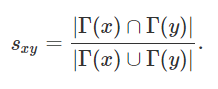

In [26]:
# Jaccard index for page likes  

def jaccard_for_likes(a, b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [27]:
# TEST CASE
# No common in-degrees between 0 and 18427
print(jaccard_for_likes(0,18427))

# common in-degrees between 22405 and 22265 (ex: 1)
print(jaccard_for_likes(22405,22265))

0.0
0.030927835051546393


In [28]:
# Jaccard index for page liked 

def jaccard_for_liked(a, b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [29]:
# TEST CASE
# No common out-degrees between 0 and 13262
print(jaccard_for_liked(0,133262))

# common out-degrees between 126 and 4601 (ex: 6353)
print(jaccard_for_liked(126,4601))

0
0.18181818181818182


**SALTON COSINE INDEX**

  
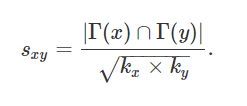

In [30]:
# Salton Cosine Index for page likes
import math

def cosine_for_likes(a, b):
    try:  
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt((len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b))))))
        return sim
    except:
        return 0

In [31]:
# TEST CASE
# No common in-degrees between 0 and 13262
print(cosine_for_likes(0,13262))

# common in-degrees between 22405 and 22265 (ex: 1)
print(cosine_for_likes(22405,22265))

0
0.1


In [32]:
# Salton Cosine Index for pages liked

def cosine_for_liked(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [33]:
# TEST CASE
# No common out-degrees between 0 and 13262
print(cosine_for_liked(0,13262))

# common out-degrees between 126 and 4601 (ex: 6353)
print(cosine_for_liked(126,4601))

0.0
0.31622776601683794


**PREFERENTIAL ATTACHEMENT INDEX**

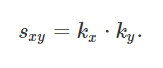

In [34]:
# Preferential Attachment Index for page likes

def prefer_attach_likes(a, b):
    try: 
        pa = (len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b))))
        return pa
    except:
        return 0

In [35]:
print(prefer_attach_likes(16590,16260))

312


In [36]:
# Preferential Attachment Index for pages liked

def prefer_attach_liked(a, b):
    try: 
        pa = (len(set(train_graph.successors(a))))*(len(set(train_graph.successors(b))))
        return pa
    except:
        return 0

In [37]:
print(prefer_attach_liked(5,40))

64


**ADAMIC-ADAR INDEX**

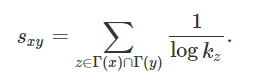

In [38]:
def adamic_adar_index(a,b):
    sum = 0
    try:
        n = list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))) 
        if len(n)!= 0:
            for i in n:
                sum = sum + (1/np.log10(len(list(train_graph.predecessors(i))))) 
            return sum
        else:
            return 0
    except:
        return 0

In [39]:
print(adamic_adar_index(160,170))

4.3810004832278535


**LIKES BACK OR NOT**

In [70]:
def likes_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [71]:
# testing 
print(likes_back(1,189226))
print(likes_back(669354,1635354))

0
0


**CHECK IF SOURCE AND DESTINATION ARE PART OF SAME COMMUNITY**

In [75]:
wcc = list(nx.weakly_connected_components(train_graph))

def same_comm(a,b):
    ''' This function returns 1 if src and dest belong to same community else 0'''
    index = []
    # if there is also an edge from b to a then a and b already belong to same community 
    if train_graph.has_edge(b,a):  
        return 1
    if train_graph.has_edge(a,b):
        for i in wcc:
            if a in i:
                index = i
                break
        if (b in index):
            train_graph.remove_edge(a,b)
            if belongs_to_same_wcc(a,b) == -1:
                train_graph.add_edge(a,b)
                return 0
            else:
                train_graph.add_edge(a,b)
                return 1
        else:
            return 0
    else:
        for i in wcc:
            if a in i:
                index = i
                break
        if (b in index):
            return 1
        else:
            return 0

In [76]:
# testing
print(same_comm(77697, 826021))
print("-------")
print(same_comm(669354,1635354))
print("-------")
print(same_comm(3, 176995))
print("-------")
print(same_comm(8611, 1659750))
print("-------")

0
-------
0
-------
0
-------
0
-------


**PAGE RANK ALGORITHM**

In [41]:
pr = nx.pagerank(train_graph, alpha = 0.85) 
# alpha is damping parameter in Page rank(default = 0.85)
pickle.dump(pr, open('page_rank.p','wb'))

In [42]:
pr = pickle.load(open('page_rank.p','rb'))

In [43]:
type(pr)

dict

In [44]:
# mean, max and mean
print('min',pr[min(pr, key = pr.get)])
print('max',pr[max(pr, key = pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.7781273007062295e-05
max 0.005538647162498356
mean 4.5795933321128734e-05


In [45]:
# for imputing to nodes that are not present in Train data
# mean imputation
mean_pr = float(sum(pr.values())) / len(pr) 
print(mean_pr)

4.5795933321128734e-05


**SHORTEST PATH**

In [46]:
# if there is a direct edge then remove that edge to compute shortest path
def compute_shortest_path_length(a,b):
    '''This function returns the shortest path length from src to dest'''
    p = -1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p = nx.shortest_path_length(train_graph, source = a, target = b)
            train_graph.add_edge(a,b)
        else:
            p = nx.shortest_path_length(train_graph, source = a, target = b)
        return p
    except nx.NetworkXNoPath:
        train_graph.add_edge(a, b)
        return -1   
    except:
        return -1 

In [47]:
# testing
compute_shortest_path_length(77697, 826021)

-1

In [48]:
# testing
compute_shortest_path_length(669354, 1635354)

-1

# **FEATURIZATION**

In [49]:
# Read a small random sample from a big CSV file into a Python data frame
# For train data

n_train = sum(1 for line in open("train_X.csv")) # number of records in file (excludes header)
print('n_train =', n_train)
s = 100000 # desired sample size 100k datapoints
skip_train = sorted(random.sample(range(1, n_train + 1), n_train - s))

n_train = 273603


In [50]:
# For test data

n_test = sum(1 for line in open("test_X.csv")) # number of records in file (excludes header)
print('n_test =', n_test)
s = 50000 # desired sample size 50k datapoints
skip_test = sorted(random.sample(range(1, n_test + 1), n_test - s))

n_test = 68402


In [51]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data: ", len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data: ", len(skip_test))

Number of rows in the train data file: 273603
Number of rows we are going to elimiate in train data:  173603
Number of rows in the test data file: 68402
Number of rows we are going to elimiate in test data:  18402


In [52]:
# final train data after sampling

df_final_train = pd.read_csv('train_X.csv', skiprows = skip_train, names = ['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows = skip_train, names = ['indicator_link'])

print("Train matrix shape:", df_final_train.shape)
df_final_train.head()

Train matrix shape: (100001, 3)


,source_node,destination_node,indicator_link
0,5951,21787,1
1,899,10379,1
2,2074,9883,1
3,10697,15649,1
4,3735,4922,1


In [53]:
df_final_train['indicator_link'].value_counts()

0    50041
1    49960
Name: indicator_link, dtype: int64

In [56]:
# final test data after sampling

df_final_test = pd.read_csv('test_X.csv', skiprows = skip_test, names = ['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows = skip_test, names = ['indicator_link'])

print("Test matrix shape:", df_final_test.shape)
df_final_test.head()

Test matrix shape: (50001, 3)


,source_node,destination_node,indicator_link
0,14981,21761,1
1,961,17258,1
2,16602,22208,1
3,2284,12936,1
4,9729,12375,1


In [57]:
df_final_test['indicator_link'].value_counts()

1    25020
0    24981
Name: indicator_link, dtype: int64

In [58]:
# check for null values: train dataframe

df_final_train.isnull().sum()

source_node         0
destination_node    0
indicator_link      0
dtype: int64

In [59]:
# check for null values: test dataframe

df_final_test.isnull().sum()

source_node         0
destination_node    0
indicator_link      0
dtype: int64

**ADDING SET OF FEATURES**

In [61]:
# mapping jaccard followers to train and test data

df_final_train['jaccard_likes'] = df_final_train.apply(lambda row: jaccard_for_likes(row['source_node'], row['destination_node']), axis=1)
df_final_test['jaccard_likes'] = df_final_test.apply(lambda row: jaccard_for_likes(row['source_node'], row['destination_node']), axis=1)

# mapping jaccard followees to train and test data

df_final_train['jaccard_liked'] = df_final_train.apply(lambda row: jaccard_for_liked(row['source_node'], row['destination_node']), axis=1)
df_final_test['jaccard_liked'] = df_final_test.apply(lambda row: jaccard_for_liked(row['source_node'], row['destination_node']), axis=1)
    
# mapping cosine followers to train and test data

df_final_train['cosine_likes'] = df_final_train.apply(lambda row: cosine_for_likes(row['source_node'], row['destination_node']), axis=1)
df_final_test['cosine_likes'] = df_final_test.apply(lambda row: cosine_for_likes(row['source_node'], row['destination_node']), axis=1)

# mapping cosine followees to train and test data

df_final_train['cosine_liked'] = df_final_train.apply(lambda row: cosine_for_liked(row['source_node'], row['destination_node']), axis=1)
df_final_test['cosine_liked'] = df_final_test.apply(lambda row: cosine_for_liked(row['source_node'], row['destination_node']), axis=1)

# mapping prefer_attach_followees to train and test data

df_final_train['prefer_attach_likes'] = df_final_train.apply(lambda row: prefer_attach_likes(row['source_node'], row['destination_node']), axis=1)
df_final_test['prefer_attach_likes'] = df_final_test.apply(lambda row: prefer_attach_likes(row['source_node'], row['destination_node']), axis=1)

# mapping jaccard followees to train and test data

df_final_train['prefer_attach_liked'] = df_final_train.apply(lambda row: prefer_attach_liked(row['source_node'], row['destination_node']), axis=1)
df_final_test['prefer_attach_liked'] = df_final_test.apply(lambda row: prefer_attach_liked(row['source_node'], row['destination_node']), axis=1)

In [62]:
def compute_features_stage1(df_final):
    ''' This function computes the num of followers, num of followees, num of common followers, num of common followees for the source and destination nodes respectively'''
    num_followers_s = []
    num_followees_s = []
    num_followers_d = []
    num_followees_d = []
    num_common_followers = []
    num_common_followees = []
    for i, row in df_final.iterrows():
        try:
            s1 = set(train_graph.predecessors(row['source_node'])) # followers of src node
            s2 = set(train_graph.successors(row['source_node']))   # followees of src node
        except:
            s1 = set()
            s2 = set()
        try:
            d1 = set(train_graph.predecessors(row['destination_node'])) # followers of dest node
            d2 = set(train_graph.successors(row['destination_node']))   # followees of dest node
        except:
            d1 = set()
            d2 = set()

        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))
        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))
        num_common_followers.append(len(s1.intersection(d1)))
        num_common_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, num_common_followers, num_common_followees

In [63]:
df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
df_final_train['num_common_followers'], df_final_train['num_common_followees'] = compute_features_stage1(df_final_train)
    
df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
df_final_test['num_common_followers'], df_final_test['num_common_followees'] = compute_features_stage1(df_final_test)

In [66]:
# storing the file in hdfs format
hdf = HDFStore('store_sample_stage1.h5')
hdf.put('train_df', df_final_train, format = 'table', data_columns = True)
hdf.put('test_df', df_final_test, format = 'table', data_columns = True)
hdf.close()

In [67]:
# read files stored in previous stage 
df_final_train = read_hdf('store_sample_stage1.h5', 'train_df', mode ='r')
df_final_test = read_hdf('store_sample_stage1.h5', 'test_df', mode ='r')

In [77]:
# mapping shortest path on train 
df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'], row['destination_node']),axis=1)
# mapping shortest path on test
df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'], row['destination_node']),axis=1)

print('shortest_path done....')
#--------------------------------------------------------------------------------------------------------
# mapping adar index on train
df_final_train['adar_index'] = df_final_train.apply(lambda row: adamic_adar_index(row['source_node'],row['destination_node']),axis=1)
# mapping adar index on test
df_final_test['adar_index'] = df_final_test.apply(lambda row: adamic_adar_index(row['source_node'],row['destination_node']),axis=1)

print('adar_index done....')
#--------------------------------------------------------------------------------------------------------
# mapping followback or not on train
df_final_train['follows_back'] = df_final_train.apply(lambda row: likes_back(row['source_node'],row['destination_node']),axis=1)
# mapping followback or not on test
df_final_test['follows_back'] = df_final_test.apply(lambda row: likes_back(row['source_node'],row['destination_node']),axis=1)

print('likes_back done.....')
#--------------------------------------------------------------------------------------------------------
# mapping same component of wcc or not on train
df_final_train['same_comp'] = df_final_train.apply(lambda row: same_comm(row['source_node'],row['destination_node']),axis=1)
# mapping same component of wcc or not on train
df_final_test['same_comp'] = df_final_test.apply(lambda row: same_comm(row['source_node'],row['destination_node']),axis=1)

print('same_comm done....')

shortest_path done....


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


adar_index done....
likes_back done.....
same_comm done....


In [78]:
df_final_train.head(2)

,source_node,destination_node,indicator_link,jaccard_likes,jaccard_liked,cosine_likes,cosine_liked,prefer_attach_likes,prefer_attach_liked,num_followers_s,num_followers_d,num_followees_s,num_followees_d,num_common_followers,num_common_followees,shortest_path,adar_index,follows_back,same_comp
0,5951,21787,1,0.105263,0.000000,0.242536,0.000000,272,0,8,34,27,0,4,0,2,0.000000,0,1
1,899,10379,1,0.000000,0.053191,0.000000,0.109897,602,2070,2,301,30,69,0,5,2,2.559114,0,1


In [79]:
df_final_test.head(2)


,source_node,destination_node,indicator_link,jaccard_likes,jaccard_liked,cosine_likes,cosine_liked,prefer_attach_likes,prefer_attach_liked,num_followers_s,num_followers_d,num_followees_s,num_followees_d,num_common_followers,num_common_followees,shortest_path,adar_index,follows_back,same_comp
0,14981,21761,1,0.014286,0.000000,0.061085,0.000000,268,0,67,4,23,0,1,0,6,0.000000,0,1
1,961,17258,1,0.000000,0.022727,0.000000,0.085848,264,2171,8,33,167,13,0,4,2,2.271135,0,1


In [80]:
# sanity check of the newly added feature
df_final_test['same_comp'].value_counts()

1    48031
0     1970
Name: same_comp, dtype: int64

In [82]:
# store the above features in hdfs file
hdf = HDFStore('storage_sample_stage2.h5')
hdf.put('train_df',df_final_train, format='table', data_columns = True)
hdf.put('test_df',df_final_test, format='table', data_columns = True)
hdf.close()

# **MACHINE LEARNING MODELS**

In [ ]:
# read previously stored data 
my_path = '/content/gdrive/My Drive/Social Network Graph Link Prediction/data/'
df_final_train = read_hdf(my_path + 'storage_sample_stage3.h5', 'train_df', mode = 'r')
df_final_test = read_hdf(my_path + 'storage_sample_stage3.h5', 'test_df', mode = 'r')

In [ ]:
# all columns 
df_final_train.columns

In [ ]:
# train and test data 
y_train = df_final_train.indicator_link
X_train = df_final_train.drop(['source_node', 'destination_node','indicator_link'], axis = 1)
y_test = df_final_test.indicator_link
X_test = df_final_test.drop(['source_node', 'destination_node','indicator_link'], axis = 1)

print('Train data:', (X_train.shape, y_train.shape))
print('Test data:', (X_test.shape, y_test.shape))

**RANDON FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(n_jobs = -1, random_state = 42)
params = {'n_estimators': [50, 100, 150, 250, 500, 1000], 
          'max_depth': [3, 5, 7, 11, 15, 35]}
clf = GridSearchCV(rfc, params, scoring = 'f1', cv = 5, return_train_score = True, n_jobs = -1)
clf.fit(X_train, y_train)

In [ ]:
# plot the performance of model both on train data and cross validation data for each hyper parameter using a Seaborn Heatmap
# reference -> https://kavisekhon.com/Grid%20Search.html

sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(
            ['param_n_estimators', 'param_max_depth']).max().unstack()[
            ['mean_train_score', 'mean_test_score']]

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.heatmap(max_scores.mean_train_score, annot = True, ax = ax[0], fmt = '.4g', cmap = "YlGnBu")
sns.heatmap(max_scores.mean_test_score, annot = True, ax = ax[1], fmt ='.4g', cmap = "YlGnBu")

ax[0].set_title('Train Set', fontsize = 15)
ax[1].set_title('CV Set', fontsize = 15)
plt.show()

In [ ]:
# random forest classifier with optimal hyperparameters found above 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(n_estimators = 150, max_depth = 15, random_state = 101, n_jobs = -1)
rfc.fit(X_train, y_train)
y_pred_train =  rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)
print("Train f1 score = ", train_f1)
print("Test f1 score = ", test_f1)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    ''' function to construct Confusion matrix, Precision matrix and Recall matrix'''
    C = confusion_matrix(test_y, predict_y) # confusion mtrix
    
    A = (((C.T)/(C.sum(axis=1))).T) # precision matrix
    
    B = (C/C.sum(axis=0)) # recall matrix
    
    plt.figure(figsize=(20, 4))
    labels = [0, 1]
    # representing Confusion matrix in heatmap format
    #cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot = True,  fmt=".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    # representing Precision matrix in heatmap format
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot = True,  fmt=".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing Recall matrix in heatmap format
    sns.heatmap(A, annot = True,  fmt=".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [ ]:
# plotting confusion matrix, precision matrix and recall matrix

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("- "*30, 'Train confusion_matrix', "- "*30)
plot_confusion_matrix(y_train, y_pred_train)
print("\nTrain F1 score:", round(train_f1, 4))
print("Train Accuracy:", round(train_accuracy*100, 2), "%")


print("- "*30, 'Test confusion_matrix', "- "*30)
plot_confusion_matrix(y_test, y_pred_test)
print("\nTest F1 score:", round(test_f1, 4))
print("Test Accuracy:", round(test_accuracy*100, 2), "%")

In [ ]:
# relative feature importance 

features = X_train.columns
importance = rfc.feature_importances_
indices = (np.argsort(importance))[-25:] # top 25 features
sns.set(style = 'ticks')
plt.figure(figsize=(8, 10))
plt.title('Feature Importance', fontsize = 15)
plt.barh(range(len(indices)), importance[indices], align ='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 12)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.grid()
plt.show()

**XGBOOST**

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

xgb = XGBClassifier(n_jobs = -1, random_state = 21)
params = {'n_estimators': [150, 250, 500, 750], 
          'max_depth': [3, 5, 7, 15, 35]}
clf = GridSearchCV(xgb, params, scoring = 'f1', cv = 5, return_train_score = True, n_jobs = -1)
clf.fit(X_train, y_train)

In [ ]:
# plot the performance of model both on train data and cross validation data for each hyper parameter using a Seaborn Heatmap
# reference -> https://kavisekhon.com/Grid%20Search.html

sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(
            ['param_n_estimators', 'param_max_depth']).max().unstack()[
            ['mean_train_score', 'mean_test_score']]

fig, ax = plt.subplots(1,2, figsize = (18, 4))
sns.heatmap(max_scores.mean_train_score, annot = True, ax = ax[0], fmt = '.5g', cmap = "YlGnBu")
sns.heatmap(max_scores.mean_test_score, annot = True, ax = ax[1], fmt ='.5g', cmap = "YlGnBu")

ax[0].set_title('Train Set', fontsize = 15)
ax[1].set_title('CV Set', fontsize = 15)
plt.show()

In [ ]:
# train xgboost model with the optimal hyperparameters found above 

xgb = XGBClassifier(n_estimators = 500, max_depth = 15, n_jobs = -1, random_state = 21)
xgb.fit(X_train, y_train)
y_pred_train =  xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print("Train f1 score = ", train_f1)
print("Test f1 score = ", test_f1)

In [ ]:
# plotting confusion matrix, precision matrix and recall matrix

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("- "*30, 'Train confusion_matrix', "- "*30)
plot_confusion_matrix(y_train, y_pred_train)
print("\nTrain F1 score:", round(train_f1, 4))
print("Train Accuracy:", round(train_accuracy*100, 2), "%")

print("- "*30, 'Test confusion_matrix', "- "*30)
plot_confusion_matrix(y_test, y_pred_test)
print("\nTest F1 score:", round(test_f1, 4))
print("Test Accuracy:", round(test_accuracy*100, 2), "%")

In [ ]:
# relative feature importance

feat_df = pd.DataFrame({'Features' : X_train.columns, 'Relative Importance' :xgb.feature_importances_})
imp_feat_df = feat_df.sort_values('Relative Importance', ascending = False)[:25]
sns.set(style = 'ticks')
plt.figure(figsize = (8, 10))
sns.barplot(y = 'Features', x = 'Relative Importance', data = imp_feat_df)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.yticks(fontsize = 12)
plt.grid()
plt.show()

NameError: ignored

# **SUMMARY & CONCLUSION**

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ('Sr.no.','Model', 'F1 Score', 'Accuracy(in %)')
table.add_row(["1.\n", "Random Forest", 0.9343, 93.77])
table.add_row(["2.", "XGBoost", 0.9318, 93.54])
print(table)